# **Assignment - 4**
# Customer Segmentation Analysis

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# **Univariate Analysis**

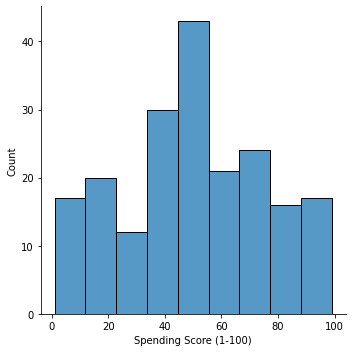

In [ ]:
sns.displot(df["Spending Score (1-100)"])

# **Bivariate Analysis**

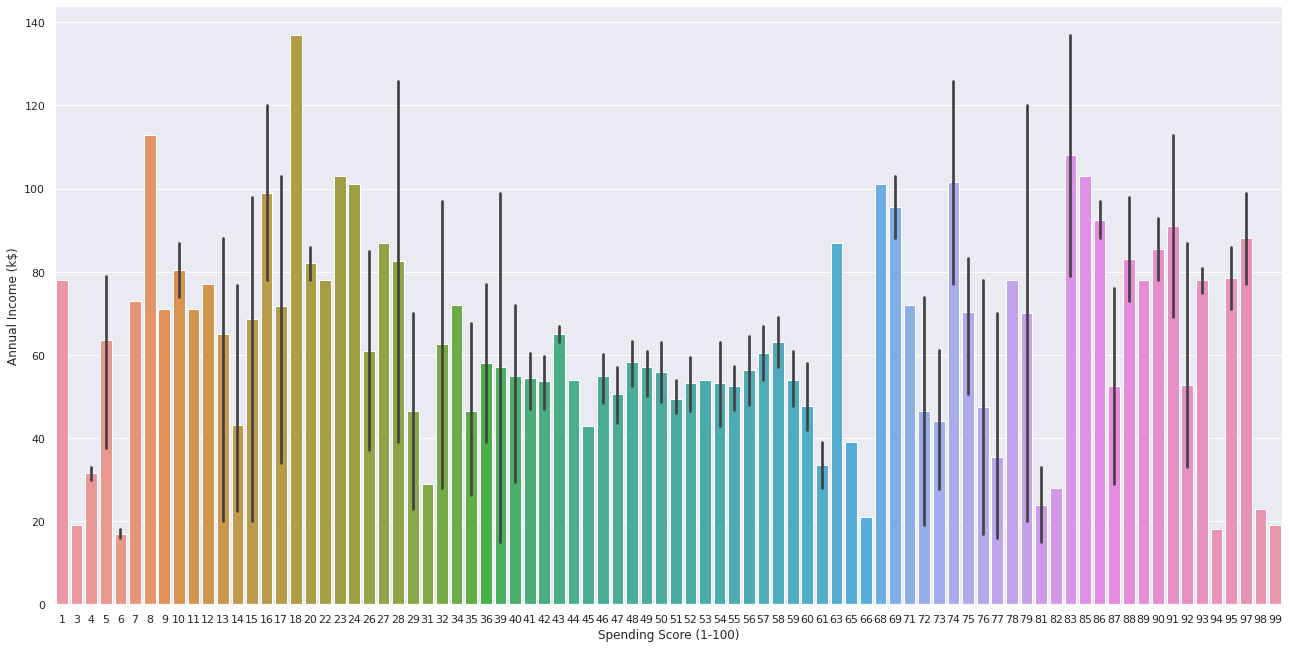

In [ ]:
sns.set(rc={'figure.figsize':(22,11)})
sns.barplot(x=df["Spending Score (1-100)"],y=df["Annual Income (k$)"])

# **Multivariate Analysis**

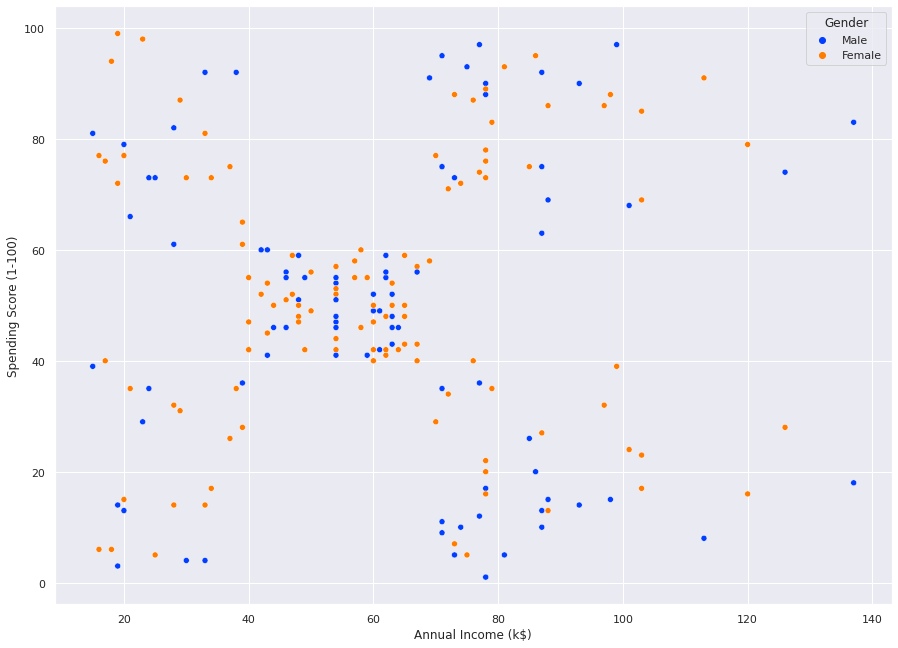

In [ ]:
sns.set(rc={'figure.figsize':(15,11)})
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)', data=df,palette='bright',hue='Gender');

# **Descriptive Statistics**

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.mean(numeric_only=True)

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [ ]:
df.std(numeric_only=True)

CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

In [ ]:
df.min(numeric_only=True)

CustomerID                 1
Age                       18
Annual Income (k$)        15
Spending Score (1-100)     1
dtype: int64

In [ ]:
df.max(numeric_only=True)

CustomerID                200
Age                        70
Annual Income (k$)        137
Spending Score (1-100)     99
dtype: int64

In [ ]:
df.count(numeric_only=True)

CustomerID                200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

# **Handling Missing values**

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No missing values

# **Finding Outliers and replacing them**

In [ ]:
sorted(df["Annual Income (k$)"])

[15,
 15,
 16,
 16,
 17,
 17,
 18,
 18,
 19,
 19,
 19,
 19,
 20,
 20,
 20,
 20,
 21,
 21,
 23,
 23,
 24,
 24,
 25,
 25,
 28,
 28,
 28,
 28,
 29,
 29,
 30,
 30,
 33,
 33,
 33,
 33,
 34,
 34,
 37,
 37,
 38,
 38,
 39,
 39,
 39,
 39,
 40,
 40,
 40,
 40,
 42,
 42,
 43,
 43,
 43,
 43,
 44,
 44,
 46,
 46,
 46,
 46,
 47,
 47,
 48,
 48,
 48,
 48,
 48,
 48,
 49,
 49,
 50,
 50,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 57,
 57,
 58,
 58,
 59,
 59,
 60,
 60,
 60,
 60,
 60,
 60,
 61,
 61,
 62,
 62,
 62,
 62,
 62,
 62,
 63,
 63,
 63,
 63,
 63,
 63,
 64,
 64,
 65,
 65,
 65,
 65,
 67,
 67,
 67,
 67,
 69,
 69,
 70,
 70,
 71,
 71,
 71,
 71,
 71,
 71,
 72,
 72,
 73,
 73,
 73,
 73,
 74,
 74,
 75,
 75,
 76,
 76,
 77,
 77,
 77,
 77,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 79,
 79,
 81,
 81,
 85,
 85,
 86,
 86,
 87,
 87,
 87,
 87,
 87,
 87,
 88,
 88,
 88,
 88,
 93,
 93,
 97,
 97,
 98,
 98,
 99,
 99,
 101,
 101,
 103,
 103,
 103,
 103,
 113,
 113,
 120,
 120,
 126,
 126

In [ ]:
quantile1,quantile3=np.percentile(df["Annual Income (k$)"],[25,75])

In [ ]:
print(quantile1,quantile3)

41.5 78.0


In [ ]:
iqr=quantile3-quantile1
lower_bound=quantile1-(1.5*iqr)
upper_bound=quantile3+(1.5*iqr)
print(lower_bound,upper_bound)

-13.25 132.75


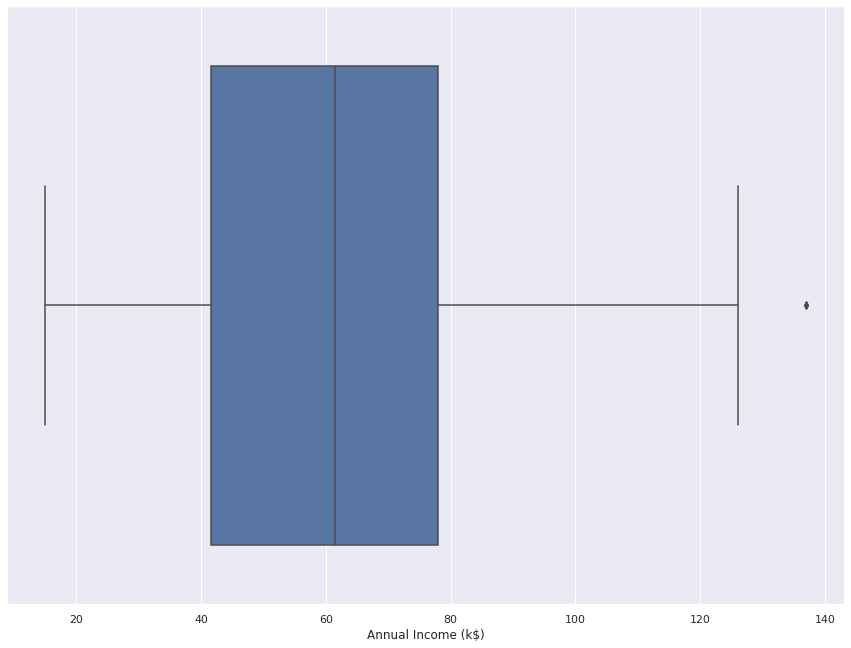

In [ ]:
sns.set(rc={'figure.figsize':(15,11)})
sns.boxplot(x=df["Annual Income (k$)"])

# **CHECK FOR CATEGORICAL COLUMNS AND PERFORM ENCODING**

In [ ]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
df["Gender"].replace({"Female":0,"Male":1},inplace = True)

In [ ]:
df.tail(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,191,0,34,103,23
191,192,0,32,103,69
192,193,1,33,113,8
193,194,0,38,113,91
194,195,0,47,120,16
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18
199,200,1,30,137,83


# **Scaling the data**

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
Customer = df[["Age","Annual Income (k$)"]]

In [9]:
scaler = StandardScaler()
scaler.fit(Customer)

StandardScaler()

# **Perform any of the clustering algorithms**

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(Customer)
centroids = kmeans.cluster_centers_
print(centroids)

[[55.03448276 50.34482759]
 [34.34782609 82.82608696]
 [28.36       31.44      ]]


# **SPLIT DATA INTO DEPENDENT AND INDEPENDENT VARIABLES**

In [11]:
x= df.iloc[:,:-1].values
y= df.iloc[:,3].values

In [12]:
x

array([[1, 'Male', 19, 15],
       [2, 'Male', 21, 15],
       [3, 'Female', 20, 16],
       [4, 'Female', 23, 16],
       [5, 'Female', 31, 17],
       [6, 'Female', 22, 17],
       [7, 'Female', 35, 18],
       [8, 'Female', 23, 18],
       [9, 'Male', 64, 19],
       [10, 'Female', 30, 19],
       [11, 'Male', 67, 19],
       [12, 'Female', 35, 19],
       [13, 'Female', 58, 20],
       [14, 'Female', 24, 20],
       [15, 'Male', 37, 20],
       [16, 'Male', 22, 20],
       [17, 'Female', 35, 21],
       [18, 'Male', 20, 21],
       [19, 'Male', 52, 23],
       [20, 'Female', 35, 23],
       [21, 'Male', 35, 24],
       [22, 'Male', 25, 24],
       [23, 'Female', 46, 25],
       [24, 'Male', 31, 25],
       [25, 'Female', 54, 28],
       [26, 'Male', 29, 28],
       [27, 'Female', 45, 28],
       [28, 'Male', 35, 28],
       [29, 'Female', 40, 29],
       [30, 'Female', 23, 29],
       [31, 'Male', 60, 30],
       [32, 'Female', 21, 30],
       [33, 'Male', 53, 33],
       [34, 'Mal

In [13]:
y

array([ 15,  15,  16,  16,  17,  17,  18,  18,  19,  19,  19,  19,  20,
        20,  20,  20,  21,  21,  23,  23,  24,  24,  25,  25,  28,  28,
        28,  28,  29,  29,  30,  30,  33,  33,  33,  33,  34,  34,  37,
        37,  38,  38,  39,  39,  39,  39,  40,  40,  40,  40,  42,  42,
        43,  43,  43,  43,  44,  44,  46,  46,  46,  46,  47,  47,  48,
        48,  48,  48,  48,  48,  49,  49,  50,  50,  54,  54,  54,  54,
        54,  54,  54,  54,  54,  54,  54,  54,  57,  57,  58,  58,  59,
        59,  60,  60,  60,  60,  60,  60,  61,  61,  62,  62,  62,  62,
        62,  62,  63,  63,  63,  63,  63,  63,  64,  64,  65,  65,  65,
        65,  67,  67,  67,  67,  69,  69,  70,  70,  71,  71,  71,  71,
        71,  71,  72,  72,  73,  73,  73,  73,  74,  74,  75,  75,  76,
        76,  77,  77,  77,  77,  78,  78,  78,  78,  78,  78,  78,  78,
        78,  78,  78,  78,  79,  79,  81,  81,  85,  85,  86,  86,  87,
        87,  87,  87,  87,  87,  88,  88,  88,  88,  93,  93,  9

# **SPLIT DATA INTO TRAINING AND TESTING**

In [14]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
x, y = make_blobs(n_samples=1000)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(700, 2) (300, 2) (700,) (300,)


# **BUILDING A MODEL, TRAINING, TESTING AND ACCURACY**

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
pred = knn.predict(x_test)

In [18]:
pred

array([1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0, 0, 2, 2, 1, 2,
       1, 2, 2, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 2, 1, 0, 2, 1, 1, 0, 1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2,
       0, 1, 0, 1, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 1, 0, 1, 0,
       1, 1, 2, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 2, 0, 2, 0,
       0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 2, 2, 1,
       2, 0, 1, 2, 1, 1, 2, 1, 2, 2, 0, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 1, 1, 2, 0,
       1, 2, 1, 1, 0, 2, 0, 1, 0, 0, 2, 2, 2, 1, 1, 0, 2, 2, 2, 1, 2, 2,
       0, 1, 1, 0, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 1, 2, 2, 2,
       1, 0, 2, 1, 0, 0, 2, 0, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2,
       1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 0, 2, 2, 2])

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy score",accuracy_score(y_test,pred))

Accuracy score 0.9833333333333333


In [20]:
confusion_matrix(y_test,pred)

array([[ 91,   0,   2],
       [  0, 106,   0],
       [  3,   0,  98]])